## Обзор данных

In [1]:
# импорт нужных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# сделаем так, чтобы jupyter не выдавал ошибки
import warnings
warnings.filterwarnings("ignore")

In [3]:
# вывод общей информации о данных
#data = pd.read_csv('games.csv')
data  = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
display(data.head(10))
display(data.info())
data.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
# найдем дубликаты 
data.duplicated().sum()

0

In [5]:
data['Name'].value_counts()

Need for Speed: Most Wanted             12
LEGO Marvel Super Heroes                 9
Ratatouille                              9
Madden NFL 07                            9
FIFA 14                                  9
                                        ..
Coven and Labyrinth of Refrain           1
Asphalt 3D                               1
Arc the Lad: Twilight of the Spirits     1
Personal Trainer: Math                   1
Atari Anniversary Edition Redux          1
Name: Name, Length: 11559, dtype: int64

In [6]:
# больше всего строчек с этим наименованием
data[data['Name']=='Need for Speed: Most Wanted']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [7]:
data['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [8]:
data['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

In [9]:
data['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [10]:
data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [11]:
data['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
0.7       2
1.3       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

In [12]:
data['User_Score'].isna().sum()

6701

В таблице 11 столбцов, согласно документации в них указаны:
* Name — название игры;
* Platform — платформа;
* Year_of_Release — год выпуска;
* Genre — жанр игры;
* NA_sales — продажи в Северной Америке (миллионы проданных копий);
* EU_sales — продажи в Европе (миллионы проданных копий);
* JP_sales — продажи в Японии (миллионы проданных копий);
* Other_sales — продажи в других странах (миллионы проданных копий);
* Critic_Score — оценка критиков (максимум 100);
* User_Score — оценка пользователей (максимум 10);
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Математическое описание дало информацию о среднем, медианном значении и стандартном отклонении по столбцам, содержащим числовые значения:
* В Year_of_Release значения распределились от 1980 до 2016 года, медиана 2007 год;
* В NA_sales - от 0 до 41.36 миллионов копий, медиана 0.08;
* В EU_sales - от 0 до 28.96 миллионов, медиана 0.02;
* В JP_sales - от 0 до 10.22 миллионов, медиана 0;
* В Other_sales - от 0 до 10.57, медиана 0.01;
* В Critic_Score - от 13 до 98 баллов, медиана 71. 

Сразу видны проблемы в данных: пропуски в 6 столбцах, ошибки в названии колонок, неверный тип данных по столбцам: `Year_of_Release`, `User_Score`. В столбце `JP_sales` медианой является ноль, видимо половина игр в списке плохо продается в Японии. В `User_Score` самое частое значение - **tbd**, хотя там должен содержаться рейтинг. Аббревиатура расшифровывается как **to be determined**, значит, рейтинг пользователей для этой игры еще не определен. Не будем удалять эти значения, можно просто заменить на **NaN**. Пропуски в столбцах могли возникнуть по разным причинам, например где-то рейтнг еще просто не определили, где-то возможно забыли заполнить значения, ошибка ввода тоже могла послужить причиной. Дубликатов не было обнаружено

Больше всего платформ захватила игра `Need for Speed: Most Wanted` - она имеет 2 версии 2005 и 2012 года, в 2013 вышла на **WiiU**. Самой популярной платформой оказалась **PS2**. Самый часты жанр - **Action**, а рейтинг - **E**. 

##### Вывод

В таблице содержится информация о продажах отдельно взятой игры и ее рейтинге в период с 1980 по 2016 год. После изучения общей информации о данных для продолжения работы требуется исправить выявленные ошибки и произвестви расчеты. Также потребуется добавить столбец по суммарным продажам в каждом регионе для отдельно взятой игры.  

## Предобработка данных

### Изменение названий столбцов

Приведём названия столбцов к нижнему регистру, чтобы с ними было удобнее работать. Посмотрим на них:

In [13]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Переименуем их следующим образом:
* `Name` → `name`
* `Platform` → `platform`
* `Year_of_Release` → `year_release`
* `Genre` → `genre`
* `NA_sales` → `na_sales`
* `EU_sales` → `eu_sales`
* `JP_sales` → `jp_sales`
* `Other_sales` → `other_sales`
* `Critic_Score` → `critic_score`
* `User_Score` → `user_score`
* `Rating` → `rating`

In [14]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Код сработал без ошибок. 

### Обработка пропущенных значений

Из обзора данных выяснилось, что пропуски есть в столбцах в 6 столбцах. В половине из это количество незначительно, поэтому просто удалим, данные это не исказит. Вторую половину придется чем-то заполнить и сделть это так, чтобы не повлиять на достоверность информации. 

Удалим строки с пропусками:

In [15]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


В столбце `user_score` встретились значения **tbd**, что посути является **NaN**. Заменим значения **tbd** на **NaN**:

In [16]:
data = data.replace('tbd', np.NaN)
data['user_score'].isna().sum()

8981

В столбце с рейтингом тоже заменим некторые значения:

In [17]:
data = data.replace(['K-A', 'EC'], 'E')
data = data.replace('RP', np.NaN)
data['rating'].value_counts()

E       3932
T       2905
M       1536
E10+    1393
AO         1
Name: rating, dtype: int64

Итак теперь нужно обработать пропуски в столбцах `user_score`, `critic_score`, `rating`. Замена значений в этих столбцах чем угодно, хоть медианой, хоть среднем в любом случае не отобразит реальной картины, скорее даже повлияет не лучшим образом на достоверность данных, поэтому стоит просто пометить пропуски, чтобы они выделялись на общей картине, например, использовать для этого `-1`. 

In [18]:
data = data.fillna(-1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Замена пропусков прошла успешно. 

### Изменение типов данных

В столбцах **year_release** и **critic_score** заменим float на int, потому что в них дискретные пременные, то есть неделимые на дробные части. В колонке **user_score** заменим object на float. 

In [19]:
data['year_of_release'] = data[data['year_of_release'].notnull()]['year_of_release'].astype(int)
data['critic_score'] = data[data['critic_score'].notnull()]['critic_score'].astype(int)
data['user_score'] = data[data['user_score'].notnull()]['user_score'].astype(float) 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Добавление нового столбца с расчетами

Посчитаем суммарные продажи по всем регионам для каждой игры, для этого просто суммируем столбцы. 

In [20]:
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis = 1) 
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,-1,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,-1,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,-1,28.31


##### Вывод

Предобработка данных прошла успешно, мы поменяли типы данных в некоторых столбцах, заполнили пропуски, привлеи названия колонок к нижнему регистру. Также произвели расчеты суммарных продаж по все регионам для каждой игры. 

## Исследовательский анализ данных

### Количество игр, выпущенных по годам

Посмотрим на количество игр, выпущенных по годам, чтобы определить границы исследуемых данных

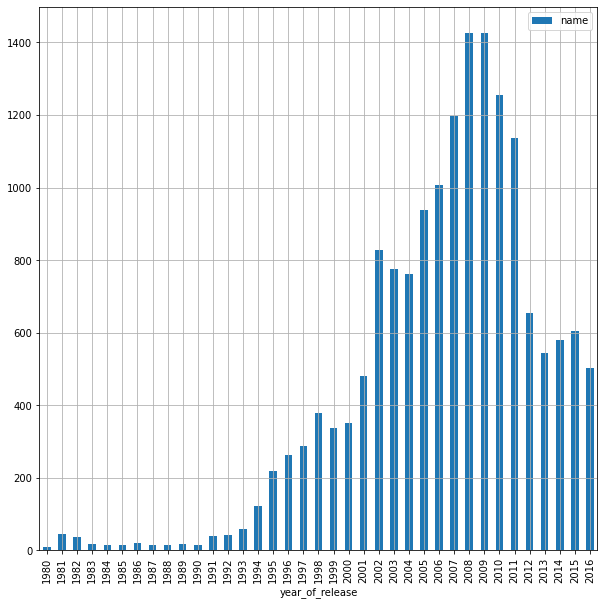

In [21]:
games_years = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
games_years.plot(kind='bar', grid=True, figsize=(10, 10))
plt.show()

##### Вывод
В целом данные скошены влево. На графике четко видно, что рост выпускаемых игр начался в **1991** и пик пришелся на **2008**, затем начался спад производительности. Также на этом отрезке мы наблюдаем нормальное распределение. Количество выпущенных игр до **2000** довольно мало, поэтому для исследования этот отрезок будет неактуален. 

### Изменение продаж по платформам, построение графиков

Построим столбчатую диаграмму для наглядного сравнения суммарных продаж по платформам. 

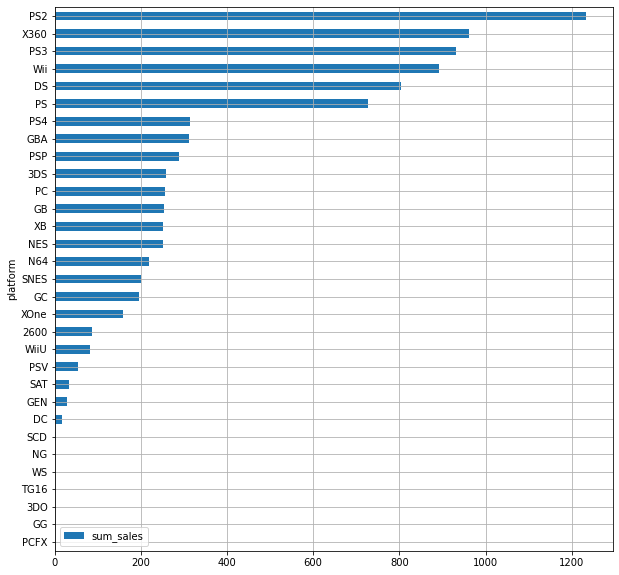

In [22]:
(data
 .pivot_table(index='platform', values='sum_sales', aggfunc='sum')
 .sort_values(by='sum_sales')
 .plot(kind='barh', grid=True, figsize=(10, 10))
)
plt.show()

Согласно графику лучшими по суммарным продажам платформами с большим отрывом оказались:
* PS2
* X360
* PS3
* Wii
* DS
* PS

Для этих платформ построим гистограммы распределение продаж по годам. 

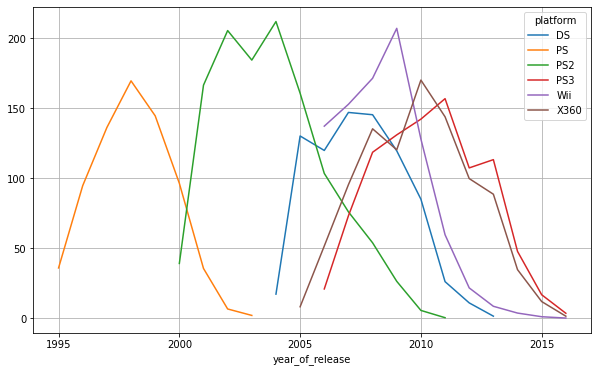

In [23]:
top_platforms = ['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PS']

(data
 .query('platform in @top_platforms')
 .query('year_of_release >= 1995')
 .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
 .plot(grid=True, figsize=(10, 6))
)
plt.show()

Внимательно посмотрев на график, можно отметить жизненный цикл каждой из популярных платформ. В среднем он составляет от 5 до 10 лет. Видим также частоту появляния новых платформ: между выходом PS и PS2 прошло ровно 5 лет, 6 лет между PS2 и PS3 (в это время PS перестала выпускаться). В период между 2004 и 2006, через 10 лет после выхода PS, появились четыре популярные платформы: DS, Wii, PS3, X360. Самой долгоживущей оказалась PS2 - примерно 11 лет. 

##### Вывод

В данном пункте мы выявили самые крупные по продажам платформы, ими оказались: PS2, X360, PS3, Wii, DS, PS. Построив график распределения продаж по годам, мы определили характерный срок популярности каждой из этих платформ - он в среднем состоставляет от 5 до 10 лет. 



### Определение актуального периода для прогноза на 2017 год

Суммируя полученную информацию, мы можем выделить актуальный период для дальнейшего анализа. Индустрия игр - динамично развивающаяся сфера, тренды в которой могут меняться за полгода. Чтобы построить точный прогноз на 2017 год, возьмем данные за период с 2014 по 2016. 

In [24]:
# в дальнейшем бум использовать эту переменную
actual_data = data.query('year_of_release >= 2014')

### Исследование по актуальному периоду 

#### Потенциально прибыльные платформы

Посмотрим на динамику продаж по консолям за этот период.

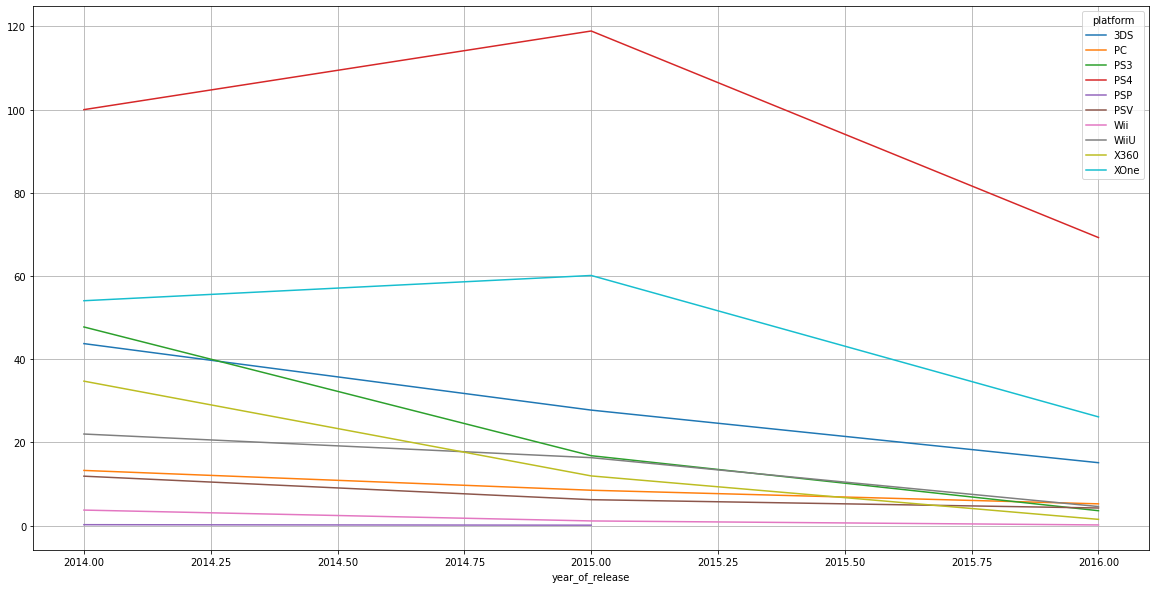

In [25]:
(actual_data
 .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
 .plot(grid=True, figsize=(20, 10))
)
plt.show()

Видим на графике, что все платформы к 2016 году теряют в продажах. В тройку лидеров входят:
* PS4
* XOne
* 3DS

Их можно назвать потенциально прибыльными, потому что у первых двух продажи игр росли с момента выхода и до 2015 года, затем наблюдался спад до 2016. Продажи на 3DS плавно падали к 2016 году, но их все равно больше, чем у оставшихся платформ. 

Посмотрим на распределение выпущенных игр для этих консолей по годам:

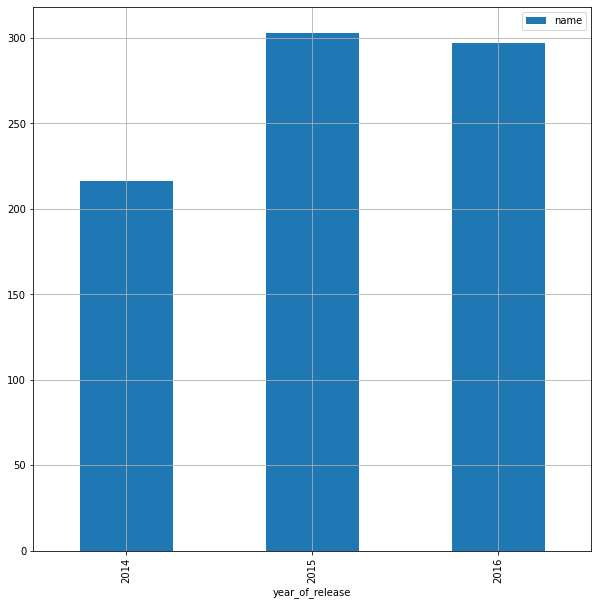

In [26]:
actual_top = ['PS4', 'XOne', '3DS']
(actual_data
 .query('platform in @actual_top')
 .pivot_table(index='year_of_release', values='name', aggfunc='count')
 .plot(kind='bar', grid=True, figsize=(10, 10))
)
plt.show()

На данном графике видно, сколько игр вышло на актулальных популярных платформах за нужный нам период: наблюдается быстрый рост к 2015, но в 2016 их уже стало чуть-чуть меньше.

#### Построение графиков по глобальным продажам игр

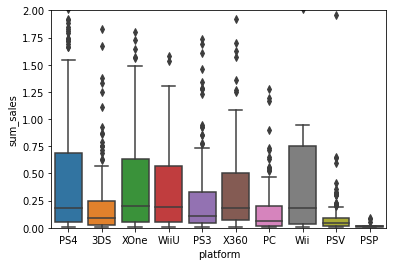

In [27]:
ax = sns.boxplot(x='platform', y='sum_sales', data=actual_data)
ax.set_ylim(0, 2)
plt.show()

##### Вывод:

На графике видно, что у платформ PS4, XOne, WiiU, X360, Wii медиана находится примерно на одном уровне - 0.20 млн. копий. 3DS, PS3 имеют медиану в районе 0.10 млн. копий. Продаж у PSP меньше всего, поэтому определить для нее продажи по графику крайне сложно. 

#### Взаимосвязь рейтингов с продажами на одной платформе

Судя по полученным данным, самой перспективной платформой оказалась **PS4**, поэтому для нее проверим взаимосвязь глобальных продаж и оценок критиков и пользователей. Нужно найти коэффицент корреляции и построить диаграмму рассеяния для обоих параметров. В таблице имеются значения рейтинга "-1" - эти значения являются незаполненными данными, тк ранее мы их заменили. Отбросим эти значения.

In [28]:
# переменная с данными по одной платформе
ps4_data = actual_data.query(('platform == "PS4"'))
ps4_data = ps4_data.query('user_score > -1')
ps4_data = ps4_data.query('critic_score > -1')

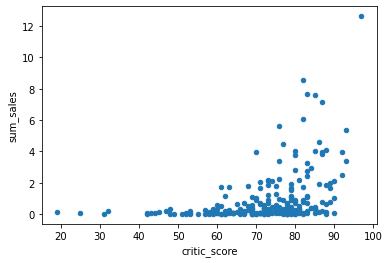

Коэффицент корреляции: 


0.4019028781147529

In [29]:
ps4_data.plot(x='critic_score', y='sum_sales', kind='scatter')
plt.show()
print("Коэффицент корреляции: ")
ps4_data['sum_sales'].corr(ps4_data['critic_score'])

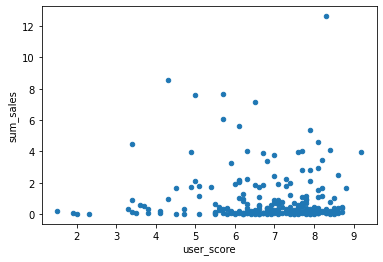

Коэффицент корреляции: 


-0.0431858599719363

In [30]:
ps4_data.plot(x='user_score', y='sum_sales', kind='scatter')
plt.show()
print("Коэффицент корреляции: ")
ps4_data['sum_sales'].corr(ps4_data['user_score'])

##### Вывод

Итак, исследование показывает, что продажи на PS4 довольно слабо **зависят** от оценок критиков, и скорее **не зависят** от оценок пользователей. В обоих случаях большинство продаж сосредоточено между оценками 6 и 8 (60 и 80).

#### Взаимосвязь рейтнгов с продажами на других платформах

Повторим действия для всех платформ. 

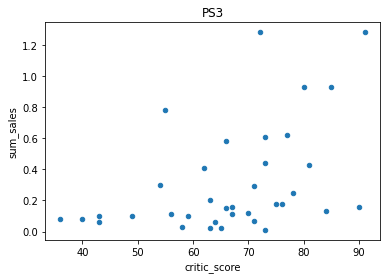

Коэффицент корреляции у PS3 :


0.44657460493190704

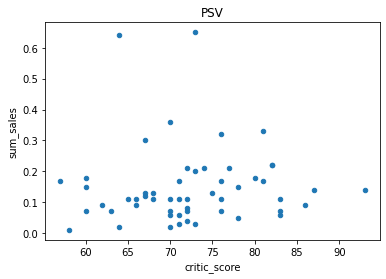

Коэффицент корреляции у PSV :


0.04266490657009526

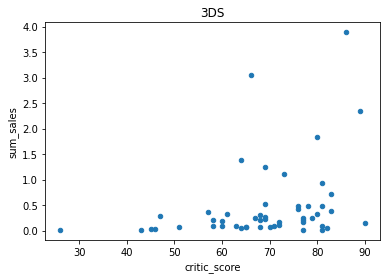

Коэффицент корреляции у 3DS :


0.31411749286905105

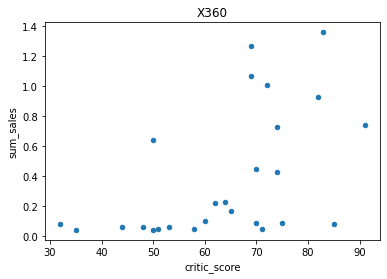

Коэффицент корреляции у X360 :


0.5257228356581523

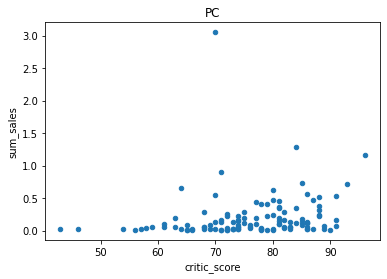

Коэффицент корреляции у PC :


0.17463413769350036

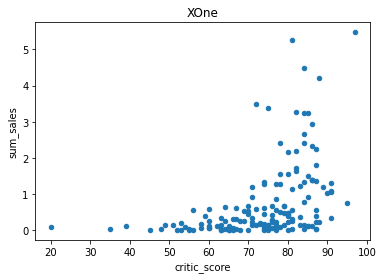

Коэффицент корреляции у XOne :


0.42867694370333226

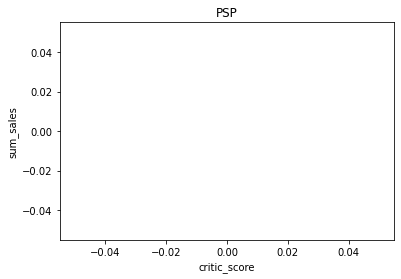

Коэффицент корреляции у PSP :


nan

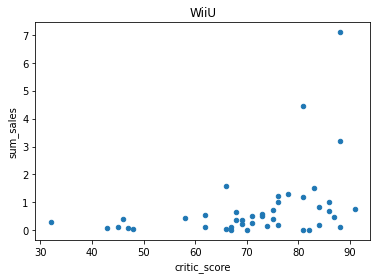

Коэффицент корреляции у WiiU :


0.370201412480884

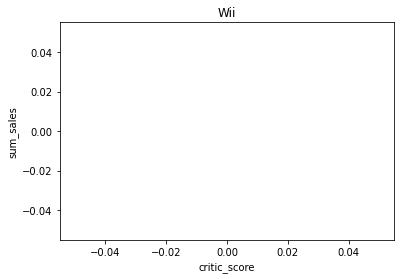

Коэффицент корреляции у Wii :


nan

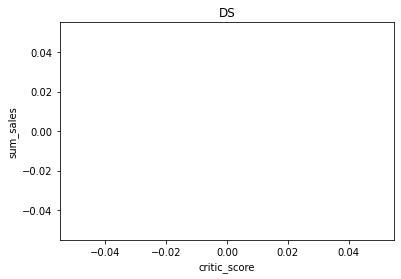

Коэффицент корреляции у DS :


nan

In [31]:
plats = ['PS3', 'PSV', '3DS', 'X360', 'PC', 'XOne', 'PSP', 'WiiU', 'Wii', 'DS']

for plat in plats:
    x = actual_data.query(('platform == @plat'))
    x = x.query('critic_score > -1')
    x.plot(x='critic_score', y='sum_sales', kind='scatter')
    plt.title(plat)
    plt.show()
    print('Коэффицент корреляции у', plat, ':')
    display(x['sum_sales'].corr(x['critic_score']))


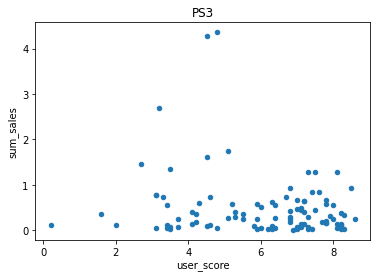

Коэффицент корреляции у PS3 :


-0.16676141347662116

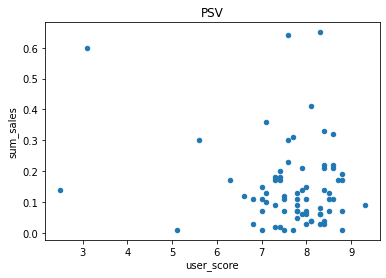

Коэффицент корреляции у PSV :


-0.16845504978064446

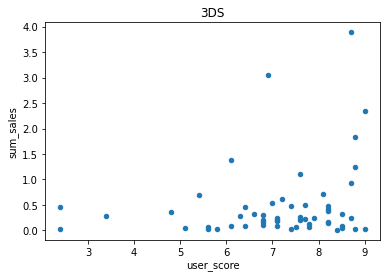

Коэффицент корреляции у 3DS :


0.2151932718527028

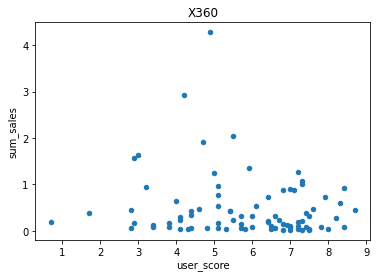

Коэффицент корреляции у X360 :


-0.138444570945665

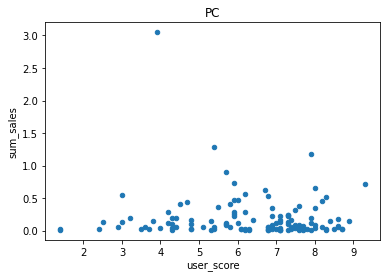

Коэффицент корреляции у PC :


-0.07159665703472452

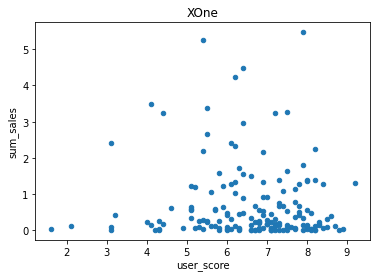

Коэффицент корреляции у XOne :


-0.0703839280647581

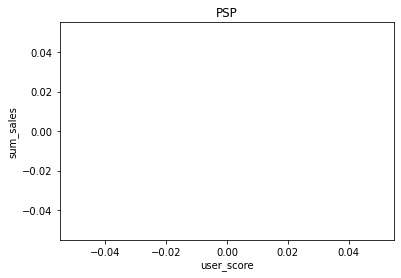

Коэффицент корреляции у PSP :


nan

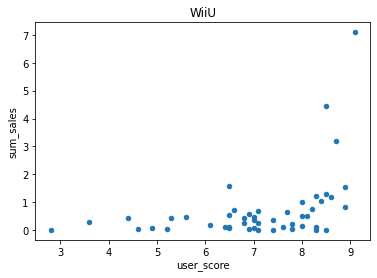

Коэффицент корреляции у WiiU :


0.4079264579217078

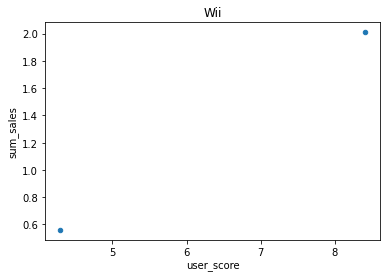

Коэффицент корреляции у Wii :


1.0

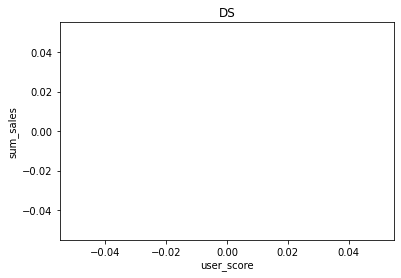

Коэффицент корреляции у DS :


nan

In [32]:
for plat in plats:
    y = actual_data.query(('platform == @plat'))
    y = y.query('user_score > -1')
    y.plot(x='user_score', y='sum_sales', kind='scatter')
    plt.title(plat)
    plt.show()
    print('Коэффицент корреляции у', plat, ':')
    display(y['sum_sales'].corr(y['user_score']))

##### Вывод
В целом ситуация похожа, оценки критиков влияют на продажи, а оценки пользователей не влияют. Разберем платформы в отдельности:
* 'PS3' - оценки критиков влияют на продажи, пользователей - нет
* 'PSV' - оценки критиков не влияют на продажи, пользователей - нет  
* '3DS' - оценки критиков влияют на продажи, пользователей - слабо
* 'X360' - оценки критиков влияют на продажи, пользователей - нет 
* 'PC' - оценки критиков немного влияют на продажи, пользователей - нет 
* 'XOne' - оценки критиков влияют на продажи, пользователей - нет 
* 'PSP' - мало данных
* 'WiiU' - оценки критиков влияют на продажи, пользователей - тоже влияют 
* 'Wii' - оценки критиков не влияют на продажи, пользователей - влияют 
* 'DS' - мало данных

Таким образом, у популярных и самых массовых платформ оценки критиков влияют на продажи, а пользователей - нет. 

#### Распределение игр по жанрам

Посмотрим на продажи, распределенные по игровым жанрам, для этого построим диаграмму:

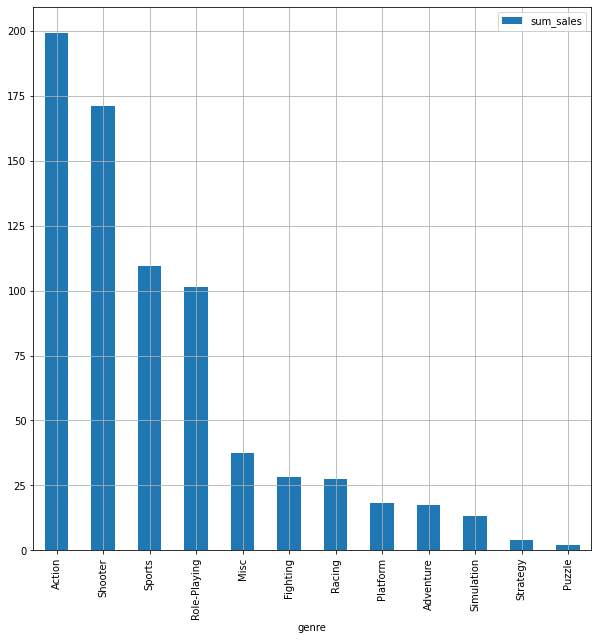

,sum_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


In [33]:
genre_count = pd.pivot_table(actual_data, index='genre', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
genre_count.plot(kind='bar', grid=True, figsize=(10, 10))
plt.show()
genre_count

На этом графике скорее всего содержится необъективная информация - за выскоми показателями общих продаж по жанру может скрываться множество мелких игр с низкими продажами или низкие рейтинги. Посмотрим на медианные продажи по жанрам. Также построим "ящик с усами" и посмотрим на распределения.  

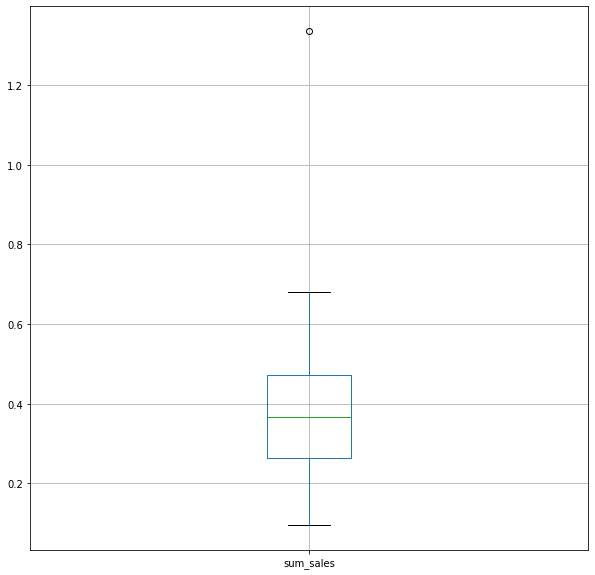

,sum_sales
genre,
Shooter,1.335469
Sports,0.680000
Platform,0.476053
Fighting,0.470333
Role-Playing,0.459005
Racing,0.398841
Misc,0.332301
Action,0.322068
Simulation,0.298409


In [34]:
genre_count_mean = pd.pivot_table(actual_data, index='genre', values='sum_sales', aggfunc='mean').sort_values(by='sum_sales', ascending=False)
genre_count_mean.plot(kind='box', grid=True, figsize=(10, 10))
plt.show()
genre_count_mean

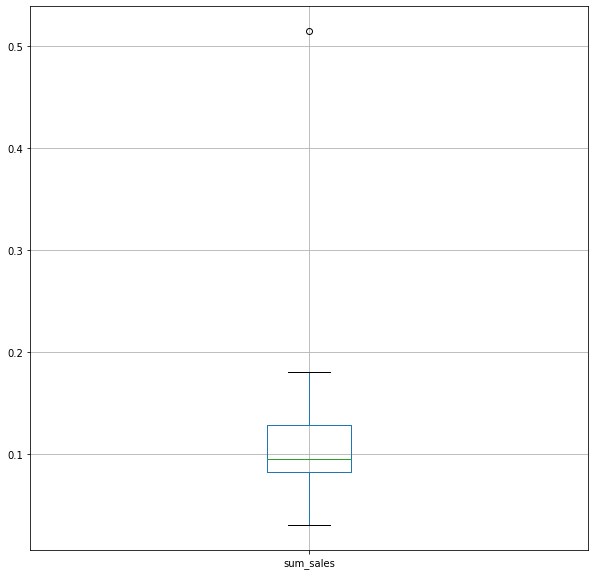

,sum_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


In [35]:
genre_count_median = pd.pivot_table(actual_data, index='genre', values='sum_sales', aggfunc='median').sort_values(by='sum_sales', ascending=False)
genre_count_median.plot(kind='box', grid=True, figsize=(10, 10))
plt.show()
genre_count_median

##### Вывод

Видим, что ситуация неоднозначная. Самым прибыльным является жанр **Shooter**. На втором месте - **Sports**, третье занимает **Platform**, сразу за ним **Fighting** и замыкает **Role-Playing**. Самым непопулярным по количеству проданных копий является жанр  **Adventure**. 

## Составление портрета пользователя

В этом пункте мы посмотрим на популярные платформы и жанры игр для отдельно взятых регионов, проведем сравнение между ними, а также выясним, влияет ли возрастной рейтинг на продажи в каждом из них. 

In [36]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = actual_data.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    plot = pivot.plot(kind='bar')
    plot.set_xlabel('')
    plot.title.set_size(20)

#### Популярные платформы

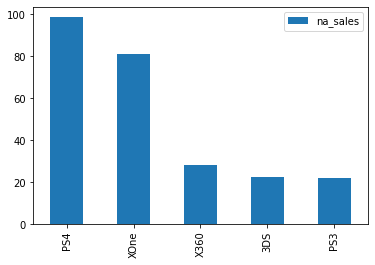

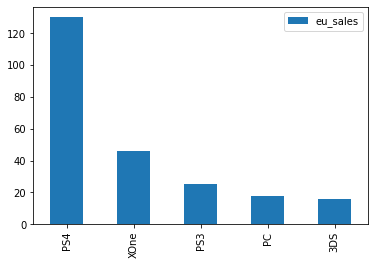

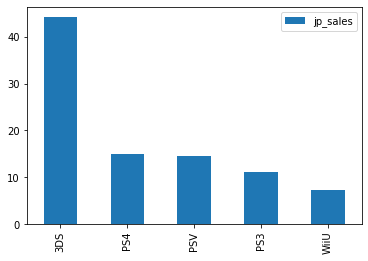

In [37]:
top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

##### Вывод

Лидирующие платформы различаются в зависимости от региона:
* В Северной Америке - это Х360
* В Европе - PS4
* В Японии - 3DS

Интересено, что у Европы и СА одни и теже платформы в топе, просто на разных позициях, а вот в Японии люди предпочитают в приницпе другие платформы. 

#### Популярные жанры

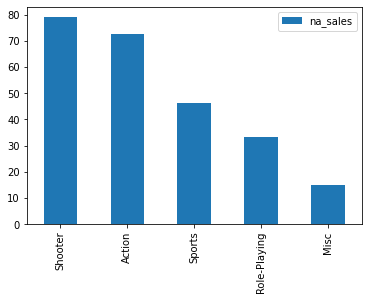

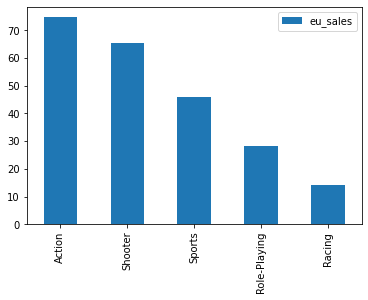

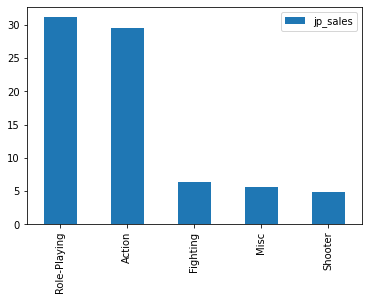

In [38]:
top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

##### Вывод

В Еропе и Северной Америке лидируюшим жанром оказался **Action**, да и в целом топ одинаковый, разве что на последнем месте в СА - **Misc**, а в Европе **Racing**. Японцы предпочитают **Role-playing** больше остальных жанров, а на последнем месте в топе **Fighting**. 

#### Влияние рейтинга ESRB

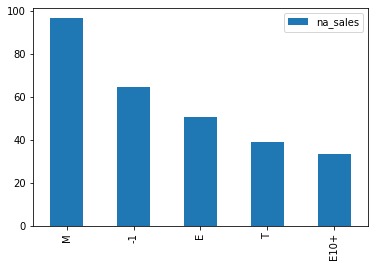

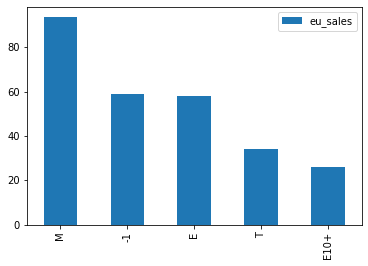

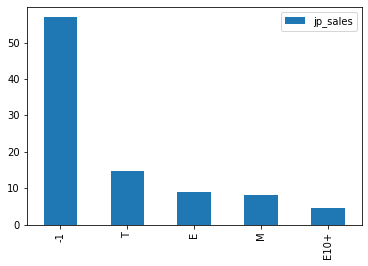

In [39]:
top_in_regions_plot('rating', 'na_sales', 0)
top_in_regions_plot('rating', 'eu_sales', 1)
top_in_regions_plot('rating', 'jp_sales', 2)

##### Вывод

У Европейского региона и СА результаты полностью совпадают - самые продаваемые игры с рейтингом **M**, замыкает пятёрку **T**. Интересно, что на третьем месте расположилось количество игр, рейтинг которым не был присвоен. 

В Японии все не так однозначно - лидиуруют игры без жанра. Это происходит потому, что рейтинговая система Америки не употребляется в Японии, так что зависимость продаж и рейтинга для этого региона просто неактуальна.  

## Проверка гипотез

### Гипотеза 1 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

* Н0:
Средние пользовательские рейтинги платформы XOne и платформы PC одинаковые 
* Н1:
Средние пользовательские рейтинги платформы XOne и платформы PC не одинаковые

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, воспользуюсь методом `scipy.stats.ttest_ind()`.

In [40]:
# срез по платформе
xone_mean = actual_data.query('platform == "XOne"')['user_score']
pc_mean = actual_data.query('platform == "PC"')['user_score']

alpha = 0.5

# беру выборку из 200 человек
xone_mean = xone_mean[0:200].tolist()
pc_mean = pc_mean[0:200].tolist()

results = st.ttest_ind(xone_mean, pc_mean)
print('p-значение:', results.pvalue)

if (results.pvalue > alpha):
    print('Нулевая гипотеза отвергнута!')
else:
    print('Нулевая гипотеза не отвергнута!')

p-значение: 0.30838391055581327
Нулевая гипотеза не отвергнута!


##### Вывод

Нулевая гипотеза не может быть отвергнута, значит нет достаточных оснований утверждать, что средние пользовательские рейтинги обоих платформ различаются. 

### Гипотеза 2 - Средние пользовательские рейтинги жанров Action и Sports разные

* Н0:
Средние пользовательские рейтинги жанров Action и Sports разные 
* Н1:
Средние пользовательские рейтинги жанров Action и Sports сходятся

In [41]:
# срез по платформе
action_mean = actual_data.query('genre == "Action"')['user_score']
sports_mean = actual_data.query('genre == "Sports"')['user_score']

alpha = 0.5

# беру выборку из 200 человек
action_mean = action_mean[0:200].tolist()
sports_mean = sports_mean[0:200].tolist()

results = st.ttest_ind(action_mean, sports_mean)
print('p-значение:', results.pvalue)

if (results.pvalue > alpha):
    print('Нулевая гипотеза отвергнута!')
else:
    print('Нулевая гипотеза не отвергнута!')

p-значение: 0.3265734440363809
Нулевая гипотеза не отвергнута!


##### Вывод

По результатам теста мы не може отвергнуть нулевую гипотезу, что означает возможность различий в рейтингах между двумя этими жанрами.

## Общий вывод

На рынке компьютерных игр наблюдается общий спад с 2008 года - это касается не только продаж и выпущенных игр, но и количество игровых платформ тоже сократилось. Самыми потенциально **прибыльными** платформами за последние 3 года являются PS4, XOne, 3DS - все потому, что они новые и поддерживают современные выпуски. Жизненный цикл игровой платформы составляет **от 5 до 10 лет**.

Исходя из исследованных данных, самую большую роль в продажах играют **оценки критиков** - это распространяется на все платформы. 

Видим, что ситуация неоднозначная. Самым прибыльным является жанр **Shooter**. На втором месте - **Sports**, третье занимает **Platform**, сразу за ним **Fighting** и замыкает **Role-Playing**. Самым непопулярным по количеству проданных копий является жанр  **Adventure**. 

Вкусы, присущие японским игрокам, резко отличаются от остального мира - это касается и консолей, и жанров, и возратсного рейтинга. Система последнего вообще не применима для жителей этого региона. 

Также мы проверяли две гипотезы. Из тестов выяснило, что средние пользовательские рейтинги на платформах XOne и PC могут быть схожими, а рейтинги жанров Action и Sports скорее всего различаются. 